# HYPOTHESIS TESTING

- <b>What is hypothesis?</b>

A hypothesis is an educated guess about something in the world around you. It should be testable, either by experiment or observation. This guess can be annything as long as we can put it to test.

- <b>what is hypothesis testing?</b>

It is a statistical method that is used in making statistical decisions using experimental data.  Hypothesis Testing is basically an assumption that we make about the population parameter. A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data.

# KEY TERMS AND CONCEPT

- <u><b>Null hypothesis:</b></u> Null hypothesis is a statistical hypothesis that assumes that the observation is due to a chance factor.  Null hypothesis is denoted by; H0: μ1 = μ2, which shows that there is no difference between the two population means.


- <u><b>Alternative hypothesis:</b></u> Contrary to the null hypothesis, the alternative hypothesis shows that observations are the result of a real effect.


- <u><b>Level of significance:</b></u> Refers to the degree of significance in which we accept or reject the null-hypothesis.  100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%.


- <u><b>Type I error:</b></u> When we reject the null hypothesis, although that hypothesis was true.  Type I error is denoted by alpha.  In hypothesis testing, the normal curve that shows the critical region is called the alpha region.


- <u><b>Type II errors:</b></u> When we accept the null hypothesis but it is false.  Type II errors are denoted by beta.  In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.


- <u><b>Power of a test:</b></u> Usually known as the probability of correctly accepting the null hypothesis.  1-beta is called power of the analysis.


- <u><b>One-tailed test:</b></u> When the given statistical hypothesis is one value like H0: μ1 = μ2, it is called the one-tailed test.


- <u><b>Two-tailed test:</b></u> When the given statistics hypothesis assumes a less than or greater than value, it is called the two-tailed test.


- <u><b> P-Value</b></u> In Statistics, P-value is the probability of obtaining results as extreme as the observed result of a statistical hypothesis test assuming that the null hypothesis is correct. It more of a calculated probability to determine whether there is evidence to reject the null hypothesis

# STEPS TO CARRY OUT AN HYPOTHESIS TESTING

- Figure out your null hypothesis,
- State your null hypothesis,
- Choose what kind of test you need to perform,
- Either support or reject the null hypothesis.

# CATEGORIES OF HYPOTHESIS TEST

    - Parametric Test
    - Non-Parametric Test

- <u>Parametric Test</u>

    parametric test are test that make assumptions about the parameters of the population distribution from which the sample is     drawn. <b>This is often the assumption that the population data are normally distributed.</b>
    
    

- <u>Non-Parametric Test</u>

    Non-parametric tests are “distribution-free” and, as such, can be used for non-Normal variables. Most times they are turn to when assumption of normality is violated.

# TYPES OF STATISTICAL HYPOTHESIS TEST

- Normality Test

        - Kolmogorov-Smirnov
        - Shapiro Wilk
        - Normal Test
        - e.t.c
        
- Correlation Tests
        
        -Pearson’s Correlation Coefficient
        - Spearman’s Rank Correlation
        - e.t.c

- Parametric Statistical Hypothesis Tests
   
       - Student’s t-test
       - Paired Student’s t-test
       - Analysis of Variance Test (ANOVA)
       - e.t.c
  
- Nonparametric Statistical Hypothesis Tests

      - Mann-Whitney U Test
      - Wilcoxon Signed-Rank Test
      - Kruskal-Wallis H Test
      - Friedman Test
      - e.t.c

- Note:
    
      For every Hypothesis testing the rejection rule state that:
    
     <b>if p-value is less than 0.05 we reject the null hypothesis otherwise we accept the null hypothesis</b>

# PRACTICAL EXAMPLES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('ggplot')

pd.set_option('max_columns', None)

### Read in data

In [2]:
train = pd.read_csv('train.csv')
train.head(3)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69


### Normality Test

 Hypothesis
    
    - Ho: Item Store returns from the 10 stores are normally distributed
    - H1: Item Store returns from the 10 stores are not normally distributed

In [3]:
import scipy.stats as stats

normal_statistics, pvalue1 = stats.shapiro(train['Item_Store_Returns'])

if pvalue1 > 0.05:
    print("The data is Normally Distributed having {0:2.3f} > 0.05".format(pvalue1))
else:
    print("The data is not normally distributed")

The data is not normally distributed


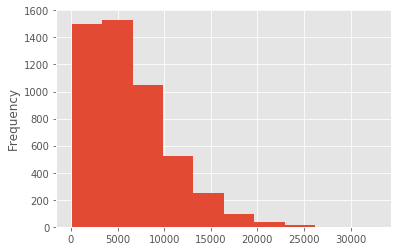

In [4]:
train['Item_Store_Returns'].plot(kind = 'hist')

### Correlation Test

Tests whether two samples have a linear relationship.

Assumptions

    - Observations in each sample are independent and identically distributed (iid).
    - Observations in each sample are normally distributed.
    - Observations in each sample have the same variance.
    
Hypothesis

    - H0: the two samples are independent.
    - H1: there is a dependency between the samples.

- Assumption Test
  
      - Normality test 
      - equality of variance test

In [5]:
sample_1 = train['Item_Price']
sample_2 = train['Item_Store_Returns']

In [6]:
for i, data in enumerate((sample_1, sample_2)):
    #test for normality
    print('=' * 40)
    print("Normality Test Result")
    n_stats, pvalue = stats.normaltest(data)
    print("t-statistic is {}, p-value is {}".format(n_stats, pvalue))
    if pvalue < 0.05:
        print("Data is not normally Distributed since {0:2.3f} < 0.05".format(pvalue))
    else:
        print("Data is normally distributed since {0:2.3f} > 0.05".format(pvalue))

Normality Test Result
t-statistic is 9.809360118440495, p-value is 0.007411814045175699
Data is not normally Distributed since 0.007 < 0.05
Normality Test Result
t-statistic is 777.9760519332917, p-value is 1.160504412943707e-169
Data is not normally Distributed since 0.000 < 0.05


In [7]:
W, pvalue = stats.levene(sample_1, sample_2)
print("t-statistic is {}, p-value is {}".format(W, pvalue))
if pvalue < 0.05:
    print("Equal variance not assumed since {0:2.3f} < 0.05".format(pvalue))
else:
    print("Equal Variance assumed since {0:2.3f} > 0.05".format(pvalue))

t-statistic is 6587.000162873451, p-value is 0.0
Equal variance not assumed since 0.000 < 0.05


Non parametric Test is applicable since the sampled data has violated all assumptions

In [8]:
from scipy.stats import spearmanr
stat, p = spearmanr(sample_1, sample_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('There is no correlation between the two samples')
else:
    print('There is correlation Between the two Samples')

stat=0.507, p=0.000
There is correlation Between the two Samples


### Independent Sample t-test

It is used to Tests whether the means of two independent samples are significantly different.

Assumptions

    - Observations in each sample are independent and identically distributed (iid).
    - Observations in each sample are normally distributed.
    - Observations in each sample have the same variance.

Hypothesis:

    - H0: the means of the samples are equal.
    - H1: the means of the samples are unequal.


In [9]:
train['Store_ID'].unique()

array(['BABATUNJI010', 'BABATUNJI013', 'BABATUNJI017', 'BABATUNJI018',
       'BABATUNJI035', 'BABATUNJI045', 'BABATUNJI019', 'BABATUNJI027',
       'BABATUNJI049', 'BABATUNJI046'], dtype=object)

In [10]:
babatunji_010 = train[train['Store_ID'] == 'BABATUNJI010']
babatunji_013 = train[train['Store_ID'] == 'BABATUNJI013']

In [11]:
import random
random.seed(200)
babatunji_010_returns = babatunji_010['Item_Store_Returns'].sample(100)
babatunji_013_returns = babatunji_013['Item_Store_Returns'].sample(100)

- Assumption Test
  
      - Normality test 
      - equality of variance test

In [12]:
for i, data in enumerate((babatunji_010_returns, babatunji_013_returns)):
    #test for normality
    print('=' * 40)
    print("Normality Test Result")
    n_stats, pvalue = stats.normaltest(data)
    print("t-statistic is {}, p-value is {}".format(n_stats, pvalue))
    if pvalue < 0.05:
        print("Data is not normally Distributed since {0:2.3f} < 0.05".format(pvalue))
    else:
        print("Data is normally distributed since {0:2.3f} > 0.05".format(pvalue))

Normality Test Result
t-statistic is 34.28928381893652, p-value is 3.582421020229839e-08
Data is not normally Distributed since 0.000 < 0.05
Normality Test Result
t-statistic is 5.727163928546591, p-value is 0.05706399256645038
Data is normally distributed since 0.057 > 0.05


In [13]:
W, pvalue = stats.levene(babatunji_010_returns, babatunji_013_returns)
print("t-statistic is {}, p-value is {}".format(W, pvalue))
if pvalue < 0.05:
    print("Equal variance not assumed since {0:2.3f} < 0.05".format(pvalue))
else:
    print("Equal Variance assumed since {0:2.3f} > 0.05".format(pvalue))

t-statistic is 97.06528227247523, p-value is 6.888486752736204e-19
Equal variance not assumed since 0.000 < 0.05


We have to switch to a non parametric test since the assumptions are voilated

In [14]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(babatunji_010_returns, babatunji_013_returns)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('There is no statistical significant difference in the mean Item store return across the two groups')
else:
    print('There is statistical significant difference in the mean Item store return across the two groups')

stat=502.500, p=0.000
There is statistical significant difference in the mean Item store return across the two groups


### One Way ANOVA Test

It is used to Test whether the means of two or more paired samples are significantly different.

- Assumptions

      - Observations in each sample are independent and identically distributed (iid).
      - Observations in each sample are normally distributed.
      - Observations in each sample have the same variance.
      - Residuals should be normally distributed.

- Hypothesis

      - H0: the means of the samples are equal.
      - H1: one or more of the means of the samples are unequal.

In [15]:
babatunji_010 = train[train['Store_ID'] == 'BABATUNJI010']
babatunji_013 = train[train['Store_ID'] == 'BABATUNJI013']
babatunji_017 = train[train['Store_ID'] == 'BABATUNJI017']

In [16]:
dat = pd.concat([babatunji_010[['Store_ID','Item_Store_Returns']].sample(100), babatunji_013[['Store_ID','Item_Store_Returns']].sample(100),
                  babatunji_017[['Store_ID','Item_Store_Returns']].sample(100)],ignore_index = True)
dat.head(3)

,Store_ID,Item_Store_Returns
0,BABATUNJI010,103.20
1,BABATUNJI010,379.51
2,BABATUNJI010,446.09


In [17]:
babatunji_010_returns = babatunji_010.loc[:100, 'Item_Store_Returns']
babatunji_013_returns = babatunji_013.loc[100:200, 'Item_Store_Returns']
babatunji_017_returns = babatunji_017.loc[200:300, 'Item_Store_Returns']

- Assumption Test
  
      - Normality test 
      - equality of variance test

In [18]:
for i, data in enumerate((babatunji_010_returns, babatunji_013_returns, babatunji_017_returns)):
    #test for normality
    print('=' * 40)
    print("Normality Test Result")
    n_stats, pvalue = stats.normaltest(data)
    print("t-statistic is {}, p-value is {}".format(n_stats, pvalue))
    if pvalue < 0.05:
        print("Data is not normally Distributed since {0:2.3f} < 0.05".format(pvalue))
    else:
        print("Data is normally distributed since {0:2.3f} > 0.05".format(pvalue))

Normality Test Result
t-statistic is 2.727543994639416, p-value is 0.25569447677735696
Data is normally distributed since 0.256 > 0.05
Normality Test Result
t-statistic is 1.7177184161965213, p-value is 0.42364509765198766
Data is normally distributed since 0.424 > 0.05
Normality Test Result
t-statistic is 1.8653338667964032, p-value is 0.39350286379578986
Data is normally distributed since 0.394 > 0.05


In [19]:
#test for equal variances acorss the three groups
W, pvalue = stats.levene(babatunji_010_returns, babatunji_013_returns,babatunji_017_returns)
print("t-statistic is {}, p-value is {}".format(W, pvalue))
if pvalue < 0.05:
    print("Equal variance not assumed since {0:2.3f} < 0.05".format(pvalue))
else:
    print("Equal Variance assumed since {0:2.3f} > 0.05".format(pvalue))

t-statistic is 5.852181346224611, p-value is 0.0066789243905719985
Equal variance not assumed since 0.007 < 0.05


We Proceed to a non-parametric test

In [20]:
#Kruskal wallis test
k,pvalue = stats.kruskal(babatunji_010_returns, babatunji_013_returns,babatunji_017_returns)
print(k,pvalue)
if pvalue < 0.05:
    print('One of the groups is different, hence we proceed to conduct a post hoc test')
else:
    pprint('No difference in the mean values of the groups')

22.549721149721137 1.2687915221747107e-05
One of the groups is different, hence we proceed to conduct a post hoc test


In [21]:
#post hoc test
import scikit_posthocs as sp
m_comp = sp.posthoc_dunn(dat,'Item_Store_Returns', 'Store_ID',p_adjust = 'holm')

In [22]:
m_comp

,BABATUNJI010,BABATUNJI013,BABATUNJI017
BABATUNJI010,1.000000e+00,8.710608e-20,2.826191e-47
BABATUNJI013,8.710608e-20,1.000000e+00,9.379144e-08
BABATUNJI017,2.826191e-47,9.379144e-08,1.000000e+00


From the above output we can see that the mean item store returns across the three groups are significantly different